## Mask Generation
To obtain the training dataset, we randomly extract sub-tomograms from the input tomograms. However, when the content in the given tomogram is sparsely distributed, most of the extracted sub-tomograms will not contain meaningful information, and there are few knowledges to be learned. To help with getting more meaningful training dataset, we introduce the *make_mask* module. Please refer to the usage below for details.  

Two types of mask are implemented in the mask generation protocol: max value mask and standard deviation mask. In practice you will encounter the following two situations.

1. If your data is a cellular tomogram, in which most space is covered with proteins, organelles, etc., you may want a mask that contains most of that information. However, the tomogram’s thickness (Z) is often larger than the sample’s. Thus, the planes near the upper and lower boundaries usually contain less information. The pixel values in those places have relatively lower standard deviation. To exclude those areas, standard deviation value mask should be mainly used.

2. If your sample distributed sparsely in the tomograms, such as the samples of purified proteins or virus, most areas in the sample only contains ice. In those areas, the mean values of pixels are relatively smaller (brighter). To exclude those areas, max value mask should be mainly used.

In real cases, we use intersection of these two masks, which are results of applying the above two mask methods, as our final mask. User should tune the parameters: *percentile* and *threshold* until getting a satisfied mask before using training command.

You can still get a reasonable result without a mask, but the mask will improve the performance substantially especially you have sparsely distributed samples.

Masks are only used when prepare training dataset in the first iteration.


#### --side
The size of the box from which the max-filter and std-filter are calculated. *side* is suggested to be set close to the size of interested particles
#### --percentile 
The approximate percentage, ranging from 0 to 100, of the area of meaningful content in tomograms. This parameter only affect the max value mask. When you don't want to use the max value mask, set the value to 100. Usually, you should use lower percentile value when having sparse tomograms.
#### --threshold
A factor of overall standard deviation and its default value is 1. This parameter only affect the std-mask. Make the threshold smaller (larger) when you want to enlarge (shrink) mask area. When you don't want to use the std-mask, set the value to 0.

### Note:
If you provide a folder path to generate mask for the tomograms in it, the corresponding masks named xxxx_mask.mrc will be generated in the given mask folder.

### Examples 

In [ ]:
mwr_cli.py mask_mask path_to_cpv_virus_folder path_to_mask_folder --percentile=20 --side=8

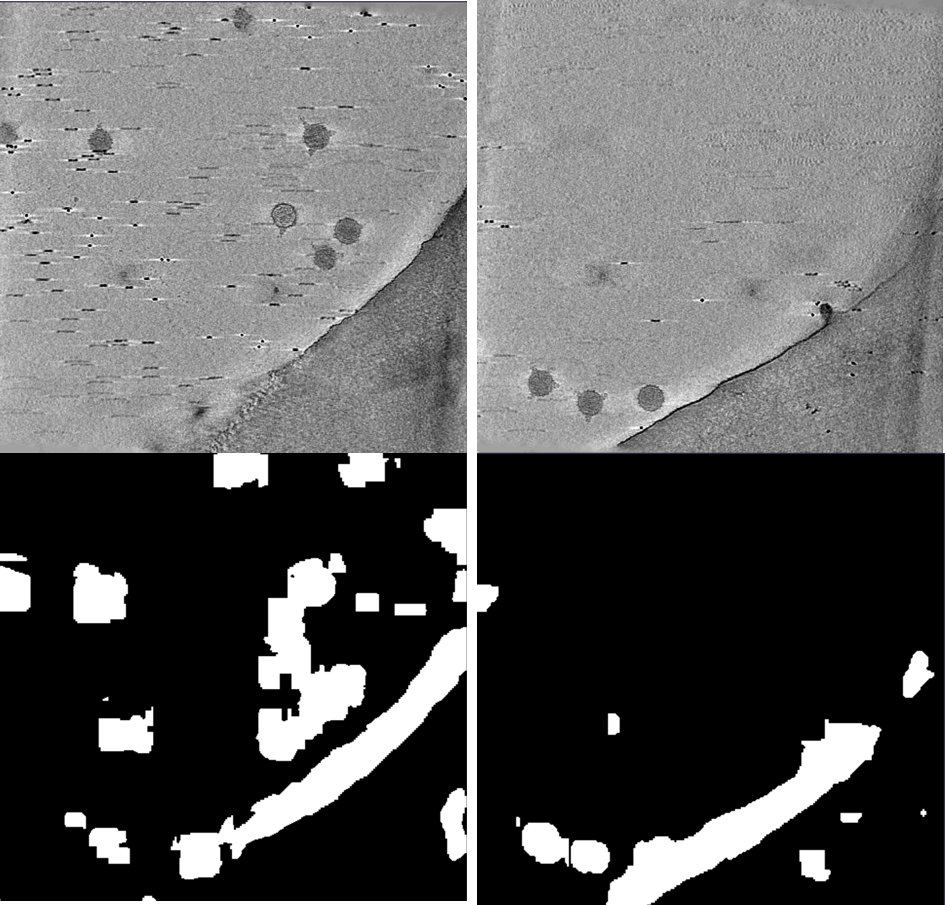

In [4]:
from IPython.display import Image
Image(filename="./images/cpv-mask-img.png",width = 500, height = 500)

In [ ]:
mwr_cli.py make_mask path_to_cellular_tomo path_to_mask --percentile=99 --side=10

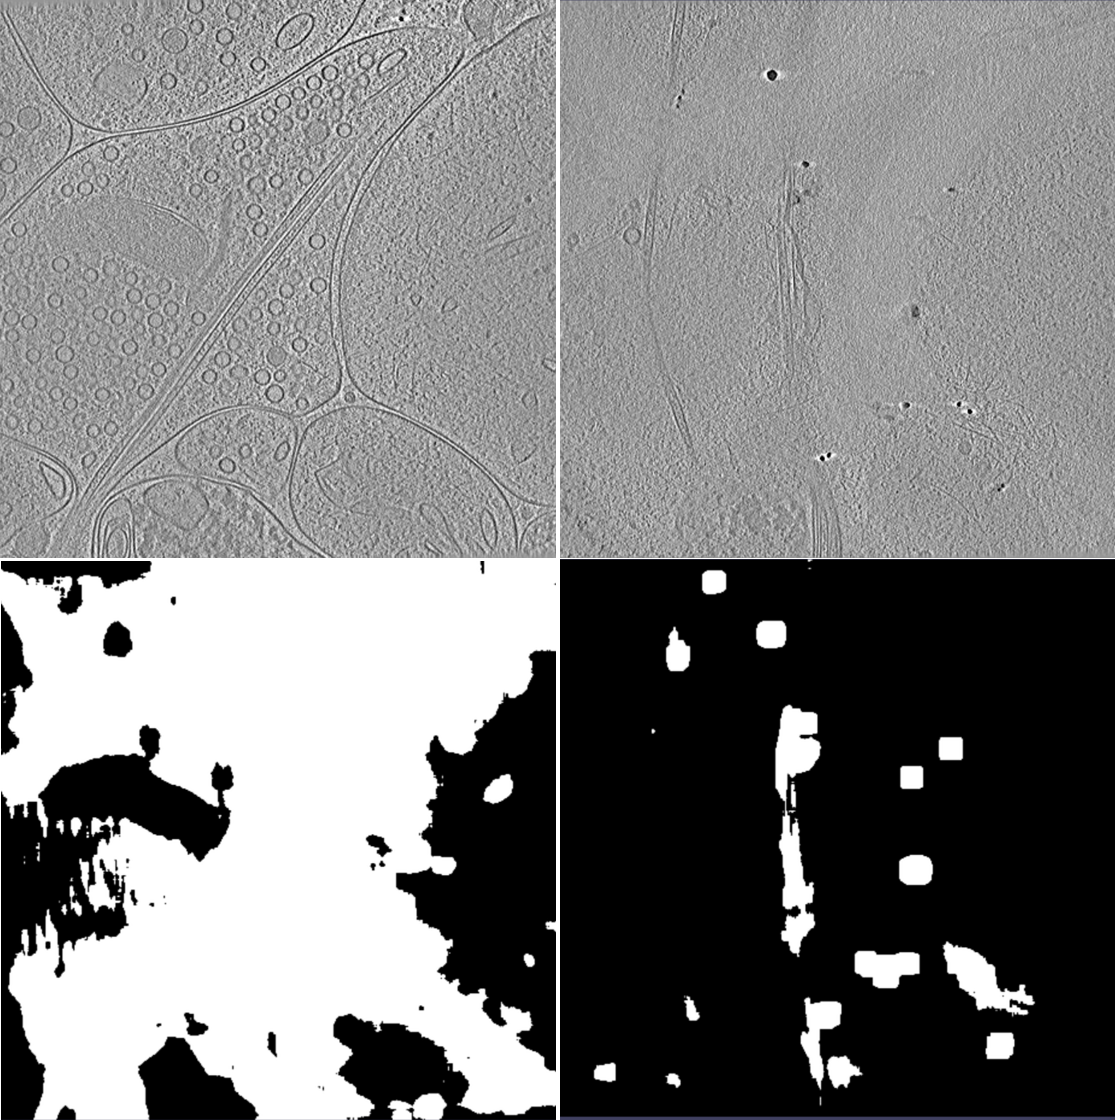

In [5]:
Image(filename="./images/pp676-mask-img.png",width = 500, height = 500)